In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes.patch import PolygonPatch

df = pd.read_csv('GFM_data.csv', sep = '\t')


df.head()

/Users/vincentlee/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2297930.0,3000000.0,73K,93 days 12:02:38.405126000,118K,72.5K,73.4K,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1862040.0,1000000.0,22.5K,205 days 12:02:39.366241000,71.7K,21.9K,22K,\nThe Navajo Nation COVID-19 Fund has been est...
2,0,https://www.gofundme.com/f/help-a-front-line-n...,Medical,0,Help a front line nurse and baby get proper care,"Randolph, NJ",954793.0,1200000.0,19K,215 days 12:02:40.340314000,16.4K,18.3K,17.9K,"On Sunday, April 12, Sylvia Leroy, a pregnant ..."
3,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,1,"Rest up, Tommy, we'll see you soon","Scottsdale, AZ",673179.0,1000000.0,11.3K,131 days 12:02:41.464483000,21.3K,10.3K,10.4K,"First, thank you for being here. Tommy Rivers ..."
4,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570529.0,750000.0,24.7K,175 days 12:02:42.383091000,5.5K,24.3K,24.5K,My name is Melissa Green and I am the mother o...


## Cleaning the data

Transforming Number_of_Donations, FB_Shares, Number_of_Donors, and Followers from Strings to floats

In [2]:
def helper(x):
    ## if string will make numeric
    if isinstance(x,str):
        x = x.replace(',','')
        ## if has ".1k" will change to numeric
        if '.' in x and 'K' in x:
            x = x.replace('.','')
            x = x.replace('K','00')
        ## if "k" will change to numeric
        if 'K' in x:
            x = x.replace('K','000')
        return x
    ## return nan
    else:
        return x
df['Number_of_Donations'] = df['Number_of_Donations'].apply(helper).astype(float)
df['FB_Shares'] = df['FB_Shares'].apply(helper).astype(float)
df['Number_of_Donors'] = df['Number_of_Donors'].apply(helper).astype(float)
df['Followers'] = df['Followers'].apply(helper).astype(float)

In [3]:
df = df.dropna()

In [4]:
df['Length_of_Fundraising']= df['Length_of_Fundraising'].apply(lambda x: int(x[:-24]))

In [5]:
df.head()

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2297930.0,3000000.0,73000.0,93,118000.0,72500.0,73400.0,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1862040.0,1000000.0,22500.0,205,71700.0,21900.0,22000.0,\nThe Navajo Nation COVID-19 Fund has been est...
2,0,https://www.gofundme.com/f/help-a-front-line-n...,Medical,0,Help a front line nurse and baby get proper care,"Randolph, NJ",954793.0,1200000.0,19000.0,215,16400.0,18300.0,17900.0,"On Sunday, April 12, Sylvia Leroy, a pregnant ..."
3,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,1,"Rest up, Tommy, we'll see you soon","Scottsdale, AZ",673179.0,1000000.0,11300.0,131,21300.0,10300.0,10400.0,"First, thank you for being here. Tommy Rivers ..."
4,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570529.0,750000.0,24700.0,175,5500.0,24300.0,24500.0,My name is Melissa Green and I am the mother o...


# Exploration

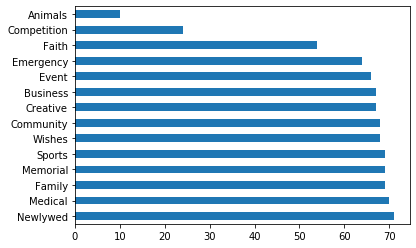

In [6]:
df['Category'].value_counts().plot(kind='barh')

In [7]:
grouped_df = df.groupby('Category')[['Amount_Raised','Goal','Number_of_Donations', 'Length_of_Fundraising', 'FB_Shares', 'Number_of_Donors', 'Followers']].mean()

Text(0.5, 1.0, 'Avg Amount Raised per Category')

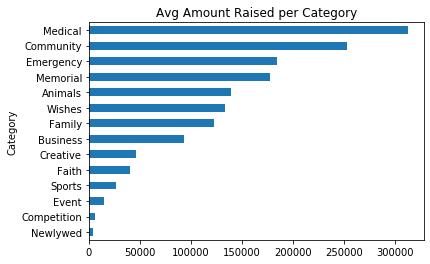

In [8]:
grouped_df['Amount_Raised'].sort_values().plot(kind = 'barh')
plt.title('Avg Amount Raised per Category')

In [9]:
df['Amount_Raised'].describe()

count    8.360000e+02
mean     1.158010e+05
std      3.220597e+05
min      6.370000e+02
25%      1.953400e+04
50%      5.287100e+04
75%      1.234118e+05
max      6.750030e+06
Name: Amount_Raised, dtype: float64

In [10]:
df['Reach Goal?'] = df['Amount_Raised'] < df['Goal']

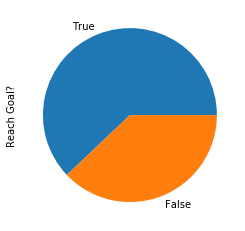

In [11]:
df['Reach Goal?'].value_counts().plot.pie()

In [12]:
df['Goal'].describe()

count    8.360000e+02
mean     1.542914e+05
std      3.028832e+05
min      1.000000e+00
25%      2.000000e+04
50%      7.500000e+04
75%      1.500000e+05
max      3.000000e+06
Name: Goal, dtype: float64

## Visualizations on Category

Text(0.5, 1.0, 'Goal per Category')

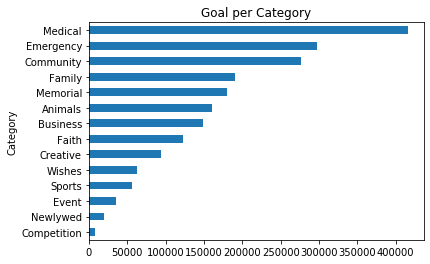

In [13]:
grouped_df['Goal'].sort_values().plot(kind = 'barh')
plt.title('Goal per Category')

Text(0.5, 1.0, 'FB Shares per Category')

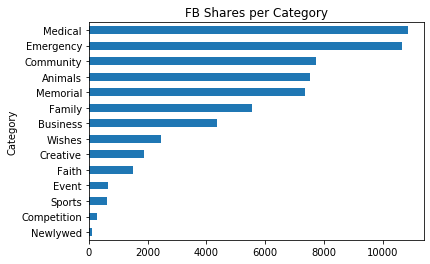

In [14]:
grouped_df['FB_Shares'].sort_values().plot(kind = 'barh')
plt.title('FB Shares per Category')

Text(0.5, 1.0, 'Followers per Category')

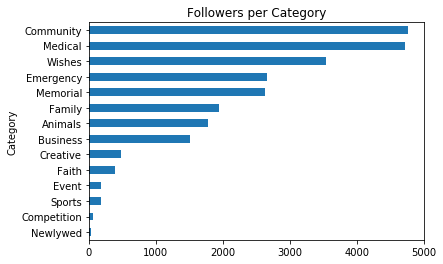

In [15]:
grouped_df['Followers'].sort_values().plot(kind = 'barh')
plt.title('Followers per Category')

## Visualizations on Amount_Raised

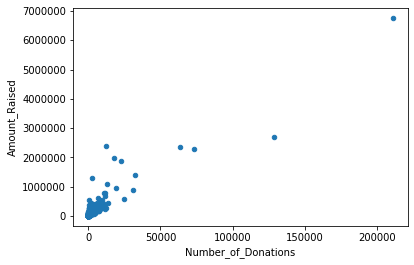

In [16]:
df.plot(kind='scatter', x ='Number_of_Donations', y = 'Amount_Raised')

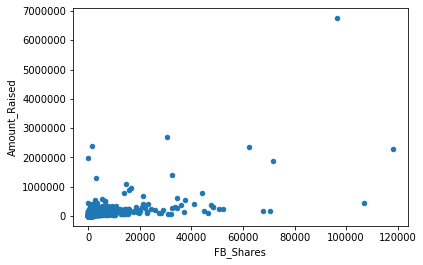

In [17]:
df.plot(kind='scatter', x='FB_Shares', y='Amount_Raised')

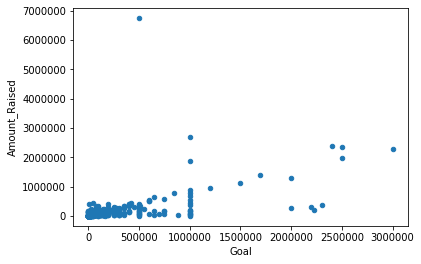

In [18]:
df.plot(kind='scatter', x='Goal', y='Amount_Raised')

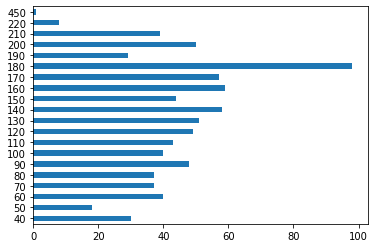

In [19]:
df['Length_of_Fundraising'].round(-1).value_counts().sort_index().plot(kind='barh')

# Geopandas 

In [20]:
from shapely.geometry import Point
from arcgis.gis import GIS
from arcgis.geocoding import Geocoder, get_geocoders, geocode
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

In [21]:
locator = Nominatim(user_agent="myGeocoder")
#geolocator = Nominatim(user_agent="specify_your_app_name_here")
#geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# 1 - convenient function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df = df.assign(address = df['Location'].apply(geocode))
# 3 - create longitude, latitude and altitude from location column (returns tuple)
df = df.assign(point = df['address'].apply(lambda loc: tuple(loc.point) if loc else None))
df.head()

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text,Reach Goal?,address,point
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2297930.0,3000000.0,73000.0,93,118000.0,72500.0,73400.0,On August 23rd my son was shot multiple times ...,True,"(Kenosha, Kenosha County, Wisconsin, United St...","(42.5846773, -87.8212263, 0.0)"
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1862040.0,1000000.0,22500.0,205,71700.0,21900.0,22000.0,\nThe Navajo Nation COVID-19 Fund has been est...,False,"(Window Rock, Dinebito Boulevard, Saint Michae...","(35.667165, -109.06345017688525, 0.0)"
2,0,https://www.gofundme.com/f/help-a-front-line-n...,Medical,0,Help a front line nurse and baby get proper care,"Randolph, NJ",954793.0,1200000.0,19000.0,215,16400.0,18300.0,17900.0,"On Sunday, April 12, Sylvia Leroy, a pregnant ...",True,"(Randolph Township, Morris County, New Jersey,...","(40.844265, -74.58572175018249, 0.0)"
3,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,1,"Rest up, Tommy, we'll see you soon","Scottsdale, AZ",673179.0,1000000.0,11300.0,131,21300.0,10300.0,10400.0,"First, thank you for being here. Tommy Rivers ...",True,"(Scottsdale, Maricopa County, Arizona, United ...","(33.4942189, -111.9260184, 0.0)"
4,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570529.0,750000.0,24700.0,175,5500.0,24300.0,24500.0,My name is Melissa Green and I am the mother o...,True,"(Tyler, Smith County, Texas, United States of ...","(32.3512601, -95.3010624, 0.0)"


In [22]:
df['Latitude'] = df['point'].dropna().apply(lambda x: x[0])
df['Longitude'] = df['point'].dropna().apply(lambda x: x[1])

In [23]:
df['geometry'] = df.apply(lambda x:Point(x['Longitude'], x['Latitude']) ,axis = 1)
gdf = gpd.GeoDataFrame(df, geometry = 'geometry')

In [24]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us = world[world['name'] == 'United States of America']

Text(0.5, 1, 'Amount Raised per Fundraiser')

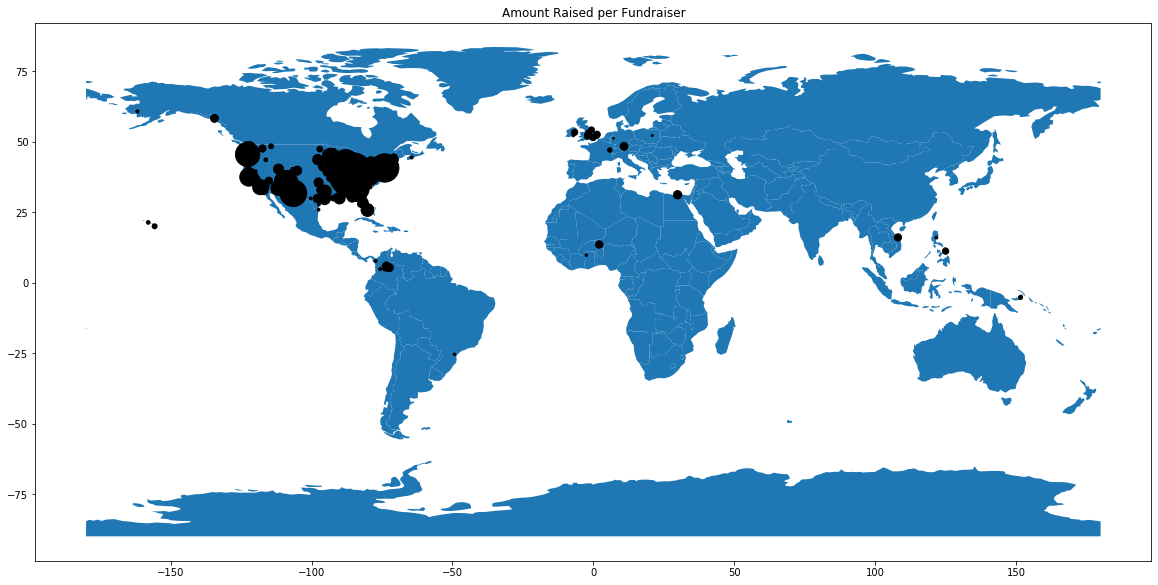

In [25]:
base = world.plot(figsize = (20,20))
## creating scales
x_max = gdf['Amount_Raised'].max()
x_min = gdf['Amount_Raised'].min()
max_size = 2000
min_size = 2
## adding circles
gdf.plot(ax=base, marker='o', color='black', markersize=min_size + (max_size-min_size)*(gdf['Amount_Raised']/x_max));
plt.title('Amount Raised per Fundraiser')


In [64]:
us_points = gdf[gdf['geometry'].apply(lambda x: x.within(us.geometry[4]))]

Text(0.5, 1, 'Amount Raised per Fundraiser')

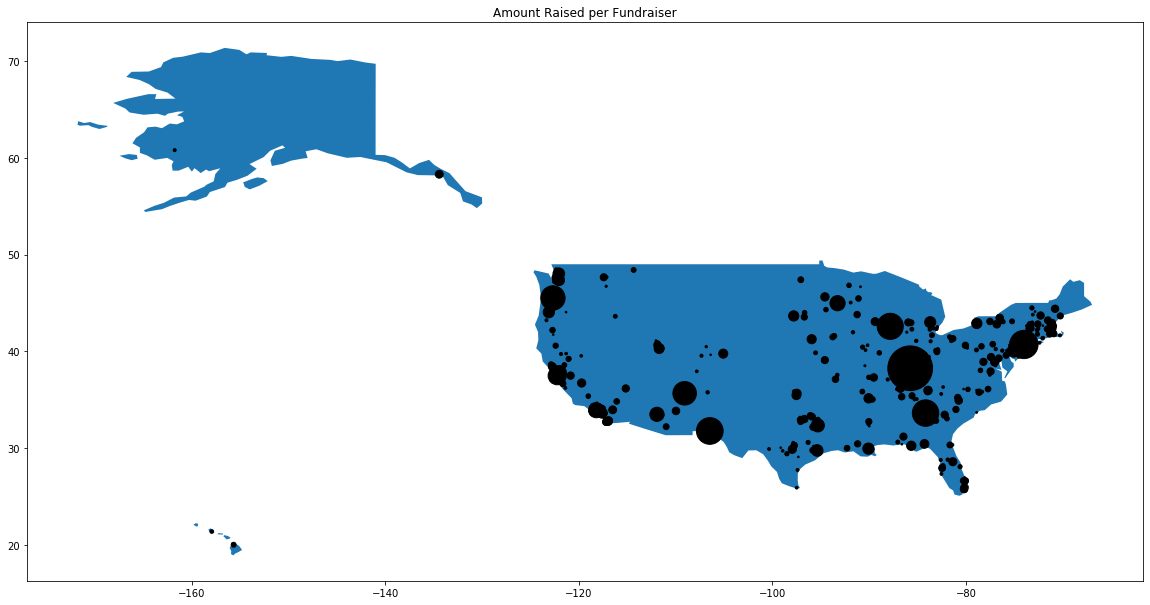

In [67]:
base = us.plot(figsize = (20,20))
## creating scales
x_max = us_points['Amount_Raised'].max()
x_min = us_points['Amount_Raised'].min()
max_size = 2000
min_size = 2
us_points.plot(ax=base, marker='o', color='black', markersize=min_size + (max_size-min_size)*(us_points['Amount_Raised']/x_max));
plt.title('Amount Raised per Fundraiser')
